In [44]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cls

def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = cls.ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = cls.ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


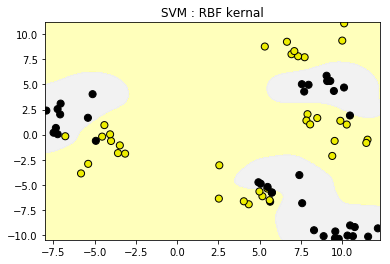

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


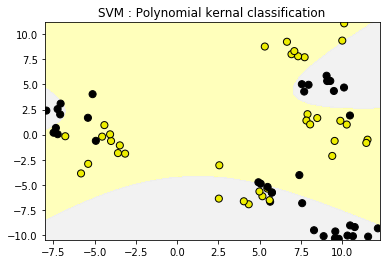

In [45]:
from sklearn.datasets import make_blobs
X_D2,y_D2 = make_blobs(n_features=2, n_samples=100, centers=8,cluster_std=1.3,random_state=4)
y_D2 = y_D2 %2
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_D2,y_D2,random_state=0)
plot_class_regions_for_classifier(SVC().fit(X_train,y_train), X_train, y_train, None, None, 'SVM : RBF kernal')
plot_class_regions_for_classifier(SVC(kernel= 'poly',degree=3).fit(X_train,y_train), X_train, y_train, None, None, 'SVM : Polynomial kernal classification')

## SVM with RBF kernal: gramma  

In [46]:
def plot_class_regions_for_classifier_subplot(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    # 返回数组的最大值或沿轴的最大值
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = cls.ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = cls.ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)

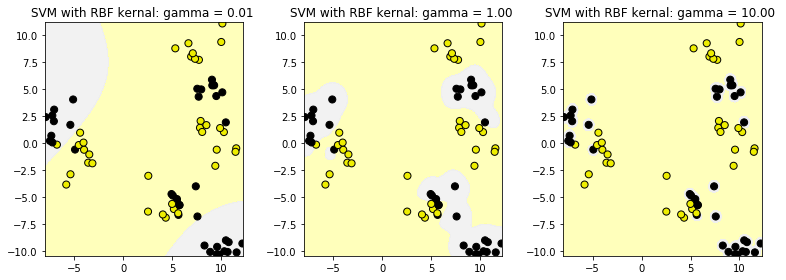

In [47]:
fig, subaxes = plt.subplots(1,3,figsize=(11,4))
for this_gamma,subplot in zip([0.01,1,10],subaxes):
    clf = SVC(kernel='rbf',gamma=this_gamma).fit(X_train,y_train)
    title = 'SVM with RBF kernal: gamma = {:.2F} '.format(this_gamma)
    plot_class_regions_for_classifier_subplot(clf,X_train,y_train,None,None,title,subplot)
    plt.tight_layout()

## SVM with RBF kernal: use both gramma and C

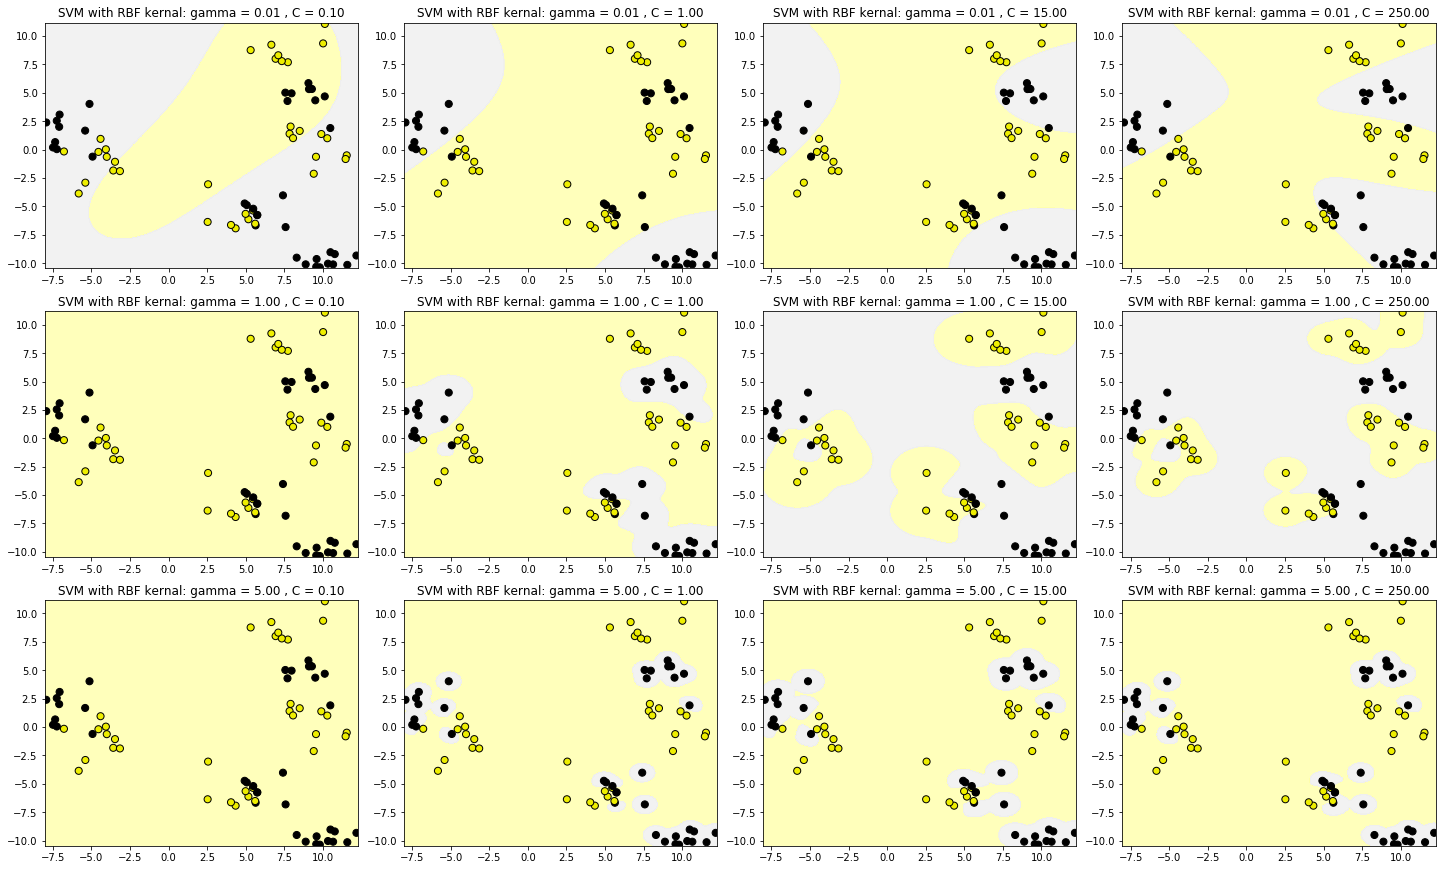

In [48]:
fig, subaxes = plt.subplots(3,4,figsize=(20,12))
for this_gamma,this_axis in zip([0.01,1,5],subaxes):
    for this_C,subplot in zip([0.1,1,15,250],this_axis):
        clf = SVC(kernel='rbf',gamma=this_gamma,C =this_C).fit(X_train,y_train)
        title = 'SVM with RBF kernal: gamma = {:.2F} , C = {:.2f}'.format(this_gamma,this_C)
        plot_class_regions_for_classifier_subplot(clf,X_train,y_train,None,None,title,subplot)
        plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=1)

## Apply SVM to real dataset : unnormalized data 

In [49]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cls
cancer = load_breast_cancer()
(X_cancer,y_cancer) = load_breast_cancer(return_X_y=True)

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X_cancer,y_cancer,random_state=0)
clf = SVC(C=10).fit(X_train,y_train)
print('breast cancer dataset with unnormalized data')
print('Accuracy of RBF-kernal classifier (training): {:.2f}'.format(clf.score(X_train,y_train)))
print('Accuracy of RBF-kernal classifier (test): {:.2f}'.format(clf.score(X_test,y_test)))

breast cancer dataset with unnormalized data
Accuracy of RBF-kernal classifier (training): 1.00
Accuracy of RBF-kernal classifier (test): 0.63


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Apply SVM to real dataset : normalized data with features processing using minmax scalling

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf = SVC(C=10).fit(X_train_scaled,y_train)
print('breast cancer dataset with unnormalized data')
print('Accuracy of RBF-kernal classifier (training): {:.2f}'.format(clf.score(X_train_scaled,y_train)))
print('Accuracy of RBF-kernal classifier (test): {:.2f}'.format(clf.score(X_test_scaled,y_test)))

breast cancer dataset with unnormalized data
Accuracy of RBF-kernal classifier (training): 0.98
Accuracy of RBF-kernal classifier (test): 0.96


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
